sections are
['font', 'title', 'label']
['fontsize', 'fontweight', 'family', 'verticalalignment', 'horizontalalignment']


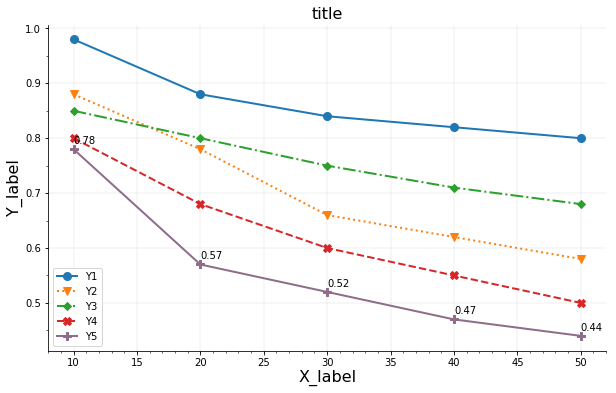

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import configparser

### test for configParser
cf = configparser.ConfigParser()
cf.read('parameter.conf')
sections = cf.sections()
print ("sections are")
print (sections)
font_options = cf.options('font')
print (font_options)
item = cf.items('font')



df = pd.DataFrame({'X' :[10,20,30,40,50],
                   'Y1':[0.98,0.88,0.84,0.82,0.8],
                   'Y2':[0.88,0.78,0.66,0.62,0.58],
                   'Y3':[0.85,0.80,0.75,0.71,0.68],
                   'Y4':[0.80,0.68,0.60,0.55,0.50],
                   'Y5':[0.78,0.57,0.52,0.47,0.44],
                   'Y6':[0.75,0.52,0.50,0.45,0.42]})


# marker type: see https://matplotlib.org/api/markers_api.html
# all possible line dash:'-',':', '-.', '--'


# font setting
font = {'fontsize':16,
        'fontweight' : 20,
        'family': 'DejaVu Sans',          # font family, default is DejaVu Sans
        'verticalalignment': 'center',    # 'top', 'bottom', 'center', 'baseline'
        'horizontalalignment': 'center'}  # 'center', 'right', 'left'



# allow multiple graphing
fig, ax = plt.subplots(figsize=(10,6))


plt.plot('X', 'Y1', data=df, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.plot('X', 'Y2', data=df, marker='v', markersize=8, linestyle=':', linewidth=2)
plt.plot('X', 'Y3', data=df, marker='D', markersize=6, linestyle='-.', linewidth=2)
plt.plot('X', 'Y4', data=df, marker='X', markersize=8, linestyle='--', linewidth=2)
plt.plot('X', 'Y5', data=df, marker='P', markersize=8, linestyle='-', linewidth=2, color='#8E6C8A')

# title
plt.title("title", font, loc='center', pad=10)

# legend
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('Y_label', fontdict=font, labelpad=10)

# ticks
#plt.xticks(np.arange(0, 55, step=5), fontsize=8)
#plt.yticks(np.arange(0, 1, step=0.2), fontsize=8)
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator) # for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(0.05)
ax.yaxis.set_minor_locator(minorLocator)

# present number on graph
for x,y in zip(df['X'].values.tolist(),df['Y5'].values.tolist()):
    plt.text(x, y+0.01, str(round(y,2)), color = 'black')


# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# background grid setting
ax.xaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color

plt.legend(ncol=1, loc='lower left')

# save plot as png file
plt.savefig('line chart.png') # save plot as png
plt.show()
